In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
with open('output') as f:
    cols = f.readline().split()
data = np.genfromtxt('output', skip_header=1, names=cols)

In [46]:
cols

['x', 's', 'rho', 'u', 'p', 'e', 'c']

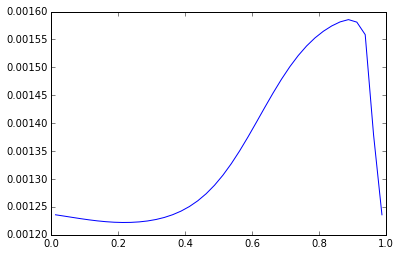

In [47]:
plt.plot(data['x'], data['rho'])

In [49]:
data['x'][0]

0.012500000000000001